In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [4]:
!pip install imbalanced-learn

In [5]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




# Project Description


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.



Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)


What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 


In [6]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Exploratory Data Analysis


In [7]:
#checking the dimension of the dataset

df.shape

(1599, 12)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [10]:
#checking the types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
df.tail

<bound method NDFrame.tail of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see there are no null values present in this dataset.

<AxesSubplot:>

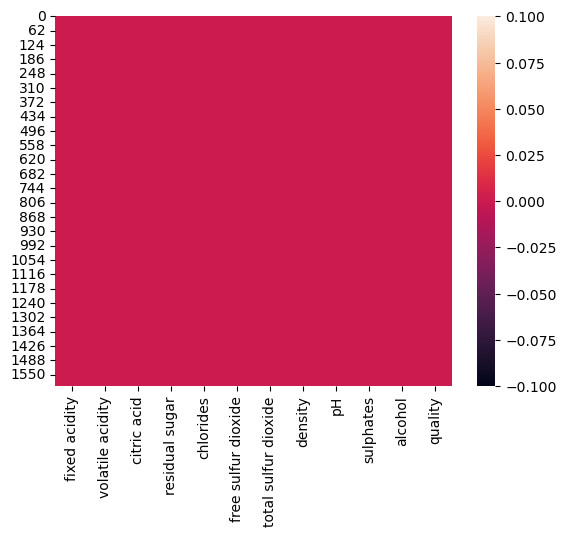

In [15]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

This gives the brief about the dataset which includes indexing type, indexing type, column type, no null values and memory usage. 

In [16]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
df['quality'].nunique()

6

In [18]:
#checking the value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

These are the value counts of all columns, let's check the unique value of column.

In [19]:
df.iloc[1594,:]

fixed acidity            6.2000
volatile acidity         0.6000
citric acid              0.0800
residual sugar           2.0000
chlorides                0.0900
free sulfur dioxide     32.0000
total sulfur dioxide    44.0000
density                  0.9949
pH                       3.4500
sulphates                0.5800
alcohol                 10.5000
quality                  5.0000
Name: 1594, dtype: float64

In [20]:
#Checking the mean of quality column

print("The mean value of quality is:", df['quality'].mean())


The mean value of quality is: 5.6360225140712945


In [21]:
#Filling null values in quality with its mean

df["quality"]=df['quality'].fillna(df['quality'].mean())


<AxesSubplot:>

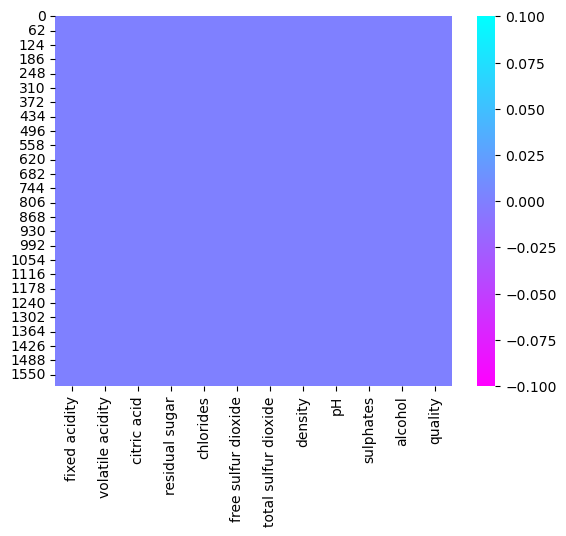

In [22]:
#Lets check the null values again

sns.heatmap(df.isnull(), cmap="cool_r")

In [23]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="float":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="float":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Numerical Columns: ['quality']


In [24]:
#checking number of unique values in each column

df.nunique().to_frame("No. of unique values")

No. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

In [25]:
#checking the list of counts of target

df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [26]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

This gives the statistical information of the numerical columns. The summary of the dataset looks perfect.

From the above description we can observe the following:

1. The counts of all the columns are same which means there are no missing values in the data set. 

2. The mean value is lower than the median(50%) Quality column which means the data is skewed to left in these column.

3. The data in the column Quality have mean value less than median which means the data is skewed to left.

4. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

5. We can also notice the Standard deviation, min 25% values from the described method. 


In [27]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Data Visualization 

Univariate Analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


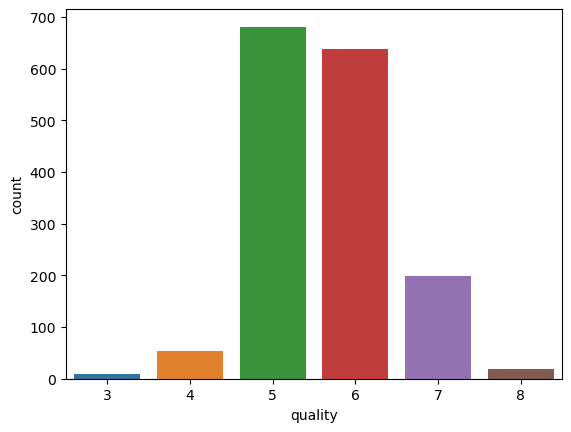

In [28]:
#visualize the number of quality column

ax=sns.countplot(x= 'quality',data=df)
print(df['quality'].value_counts())


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


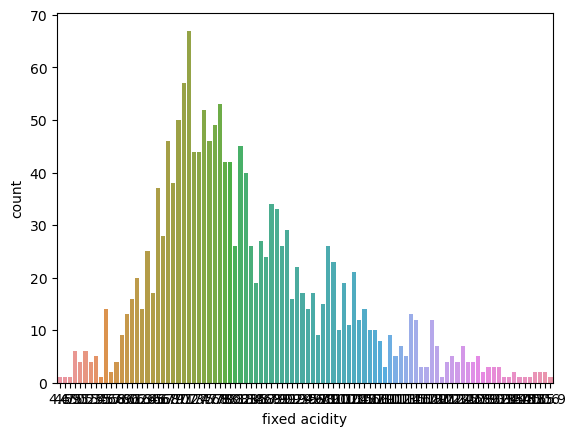

In [29]:
#visualize the number of fixed acidity

ax=sns.countplot(x= 'fixed acidity',data=df)
print(df['fixed acidity'].value_counts())

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


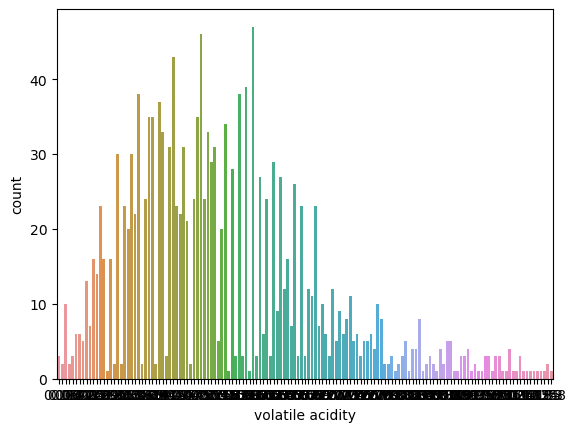

In [30]:
#visualize the number of volatile acidity column

ax=sns.countplot(x= 'volatile acidity',data=df)
print(df['volatile acidity'].value_counts())

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


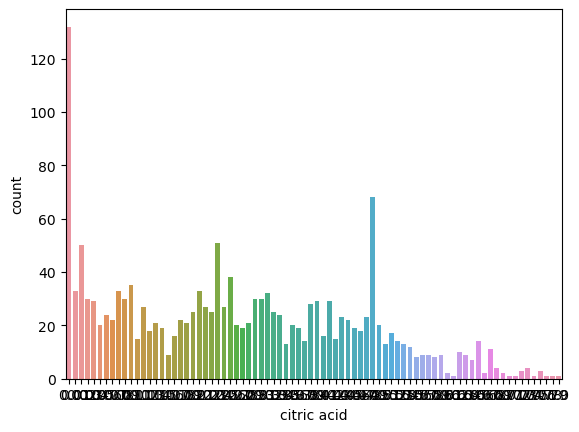

In [31]:
#visualize the number of citric acid column

ax=sns.countplot(x= 'citric acid',data=df)
print(df['citric acid'].value_counts())

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


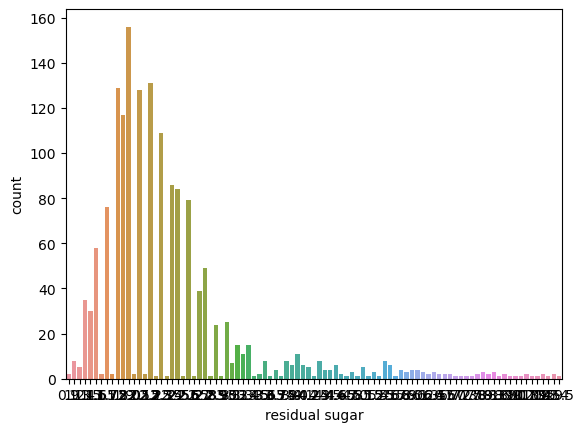

In [32]:
#visualize the number of residual sugar column

ax=sns.countplot(x= 'residual sugar',data=df)
print(df['residual sugar'].value_counts())

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


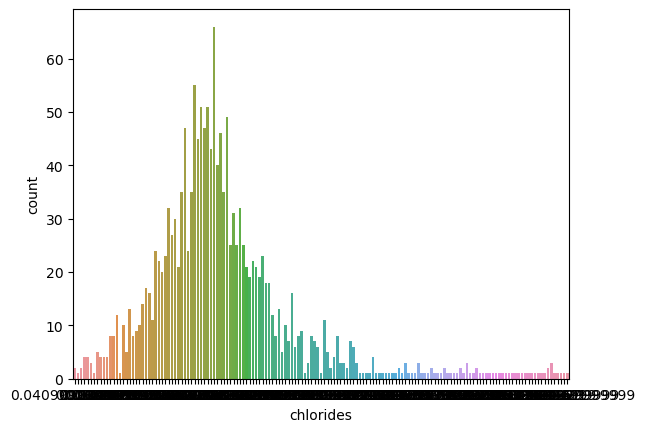

In [33]:
#visualize the number of chlorides column

ax=sns.countplot(x= 'chlorides',data=df)
print(df['chlorides'].value_counts())

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64


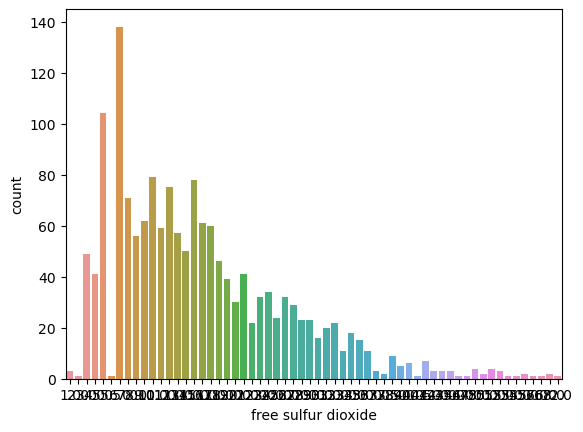

In [34]:
#visualize the number of free sulphur dioxide column

ax=sns.countplot(x= 'free sulfur dioxide',data=df)
print(df['free sulfur dioxide'].value_counts())

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64


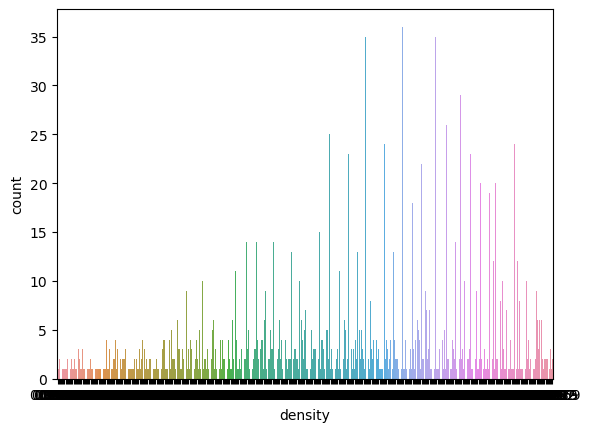

In [35]:
#visualize the number of density column

ax=sns.countplot(x= 'density',data=df)
print(df['density'].value_counts())

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64


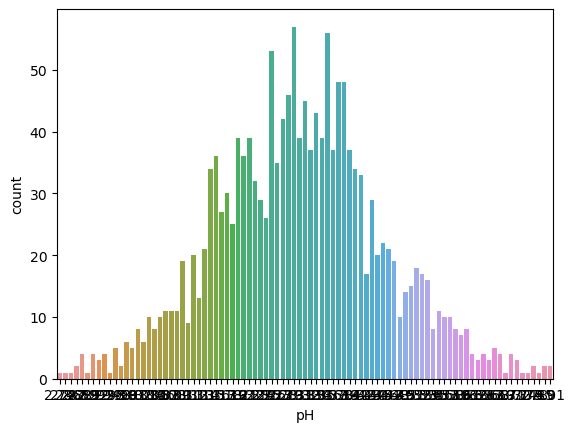

In [36]:
#visualize the number of 'PH' column

ax=sns.countplot(x='pH',data=df)
print(df['pH'].value_counts())

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64


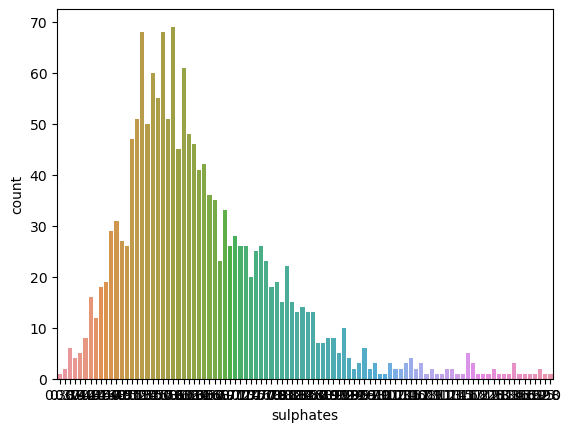

In [37]:
#visualize the number of sulphates column

ax=sns.countplot(x= 'sulphates',data=df)
print(df['sulphates'].value_counts())

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


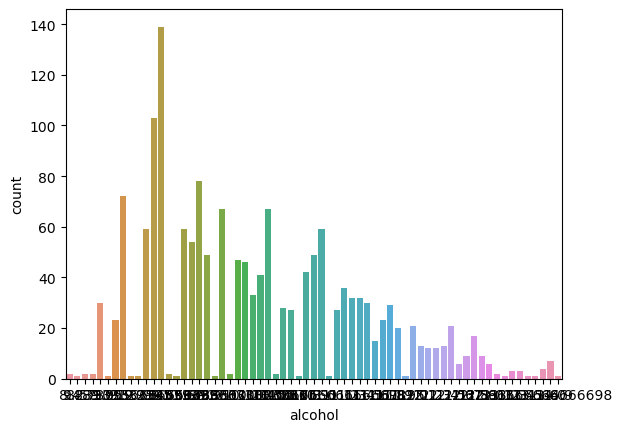

In [38]:
#visualize the number of alcohol column

ax=sns.countplot(x= 'alcohol',data=df)
print(df['alcohol'].value_counts())

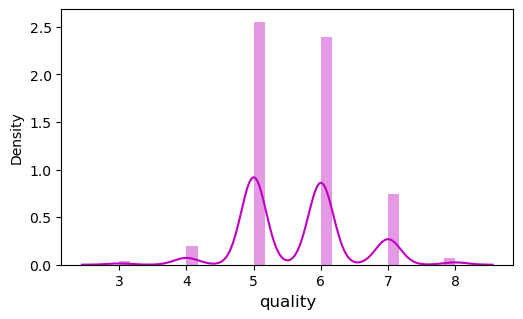

In [39]:
#Lets check how the data has been distributed in remaining column

plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber) #subplot is a method 
        sns.distplot(df[col],color ="m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

By looking at the distribution of the data 

# Bivariate Analysis

<AxesSubplot:title={'center':'Comparison between alcohol and PH'}, xlabel='alcohol', ylabel='pH'>

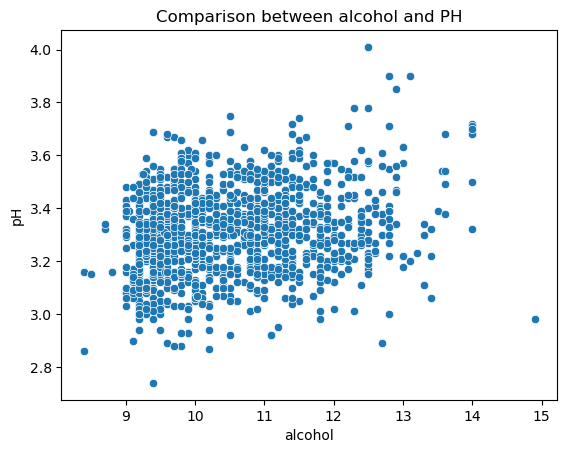

In [40]:
#when we Comparing two set of data plot: 

plt.title("Comparison between alcohol and PH")
sns.scatterplot(x="alcohol", y = "pH",data = df)

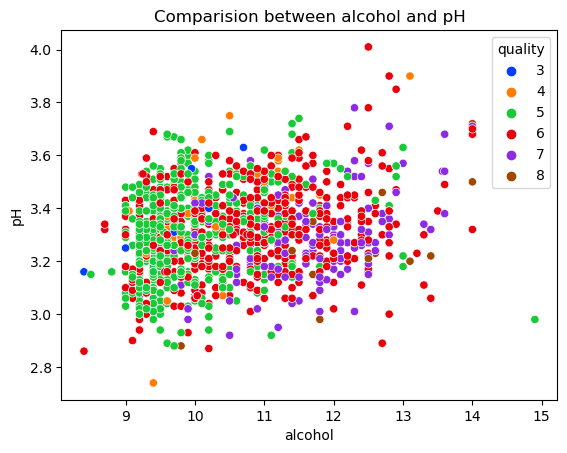

In [41]:
#comparing the alcohol and pH observing quality

plt.title("Comparision between alcohol and pH")
sns.scatterplot(x='alcohol', y='pH',data=df, hue= 'quality', palette = 'bright')
plt.show()

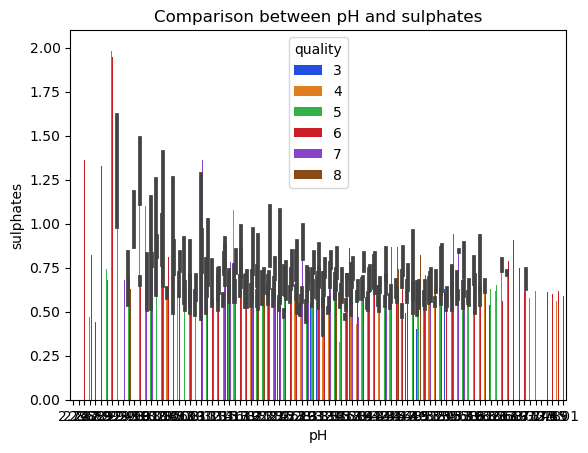

In [42]:
#comparing between pH and sulphate observing quality

plt.title("Comparison between pH and sulphates")
sns.barplot(x='pH', y='sulphates',data=df, hue= 'quality', palette = 'bright')
plt.show()

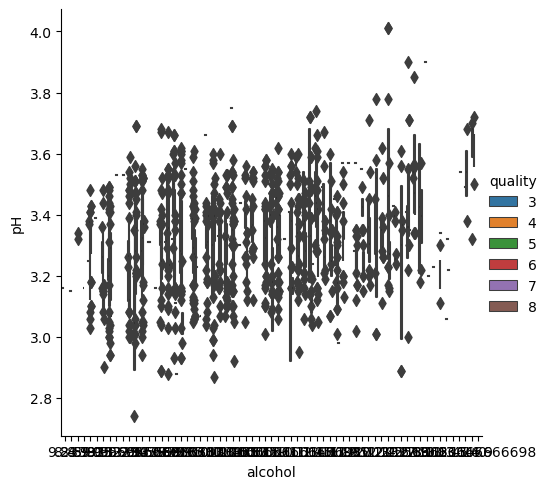

In [45]:
sns.catplot(data=df, x="alcohol", y="pH", hue="quality", kind="boxen")


# Finding the best quality of wine

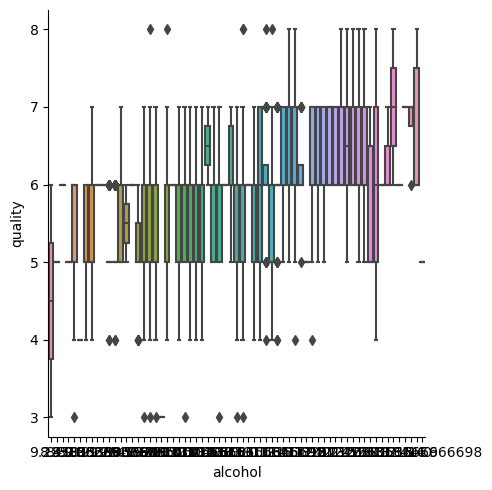

In [46]:
sns.catplot(data=df, x="alcohol", y="quality", kind="box")


In [47]:
#Let's separate good quality wine and bad quality wines based on quality number:

wines = df.shape[0]

# Filtering number of wines with quality rating above 6
above_6 = df.loc[(df['quality'] > 6)]
n_above_6 = above_6.shape[0]

# Filtering number of wines with quality rating below 5
below_5 = df.loc[(df['quality'] < 5)]
n_below_5 = below_5.shape[0]

# Filtering number of wines with quality rating between 5 to 6
between_5 = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
n_between_5 = between_5.shape[0]

# Checking percentage of wines with quality rating above 6
percentage = n_above_6*100/wines

# Print the results of number of quality wines

print("Total number of wine data: {}".format(wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6:{} ".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(percentage))


Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6:1319 
Percentage of wines with quality 7 and above: 13.57%


In [48]:
# Some more additional data analysis
display(np.round(df.describe()))



fixed acidity  volatile acidity  citric acid  residual sugar  \
count         1599.0            1599.0       1599.0          1599.0   
mean             8.0               1.0          0.0             3.0   
std              2.0               0.0          0.0             1.0   
min              5.0               0.0          0.0             1.0   
25%              7.0               0.0          0.0             2.0   
50%              8.0               1.0          0.0             2.0   
75%              9.0               1.0          0.0             3.0   
max             16.0               2.0          1.0            16.0   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count     1599.0               1599.0                1599.0   1599.0  1599.0   
mean         0.0                 16.0                  46.0      1.0     3.0   
std          0.0                 10.0                  33.0      0.0     0.0   
min          0.0                  1.0                   6.0      1.0     3.0   
25%          0.0                  7.0                  22.0      1.0     3.0   
50%          0.0                 14.0                  38.0      1.0     3.0   
75%          0.0                 21.0                  62.0      1.0     3.0   
max          1.0                 72.0                 289.0      1.0     4.0   

       sulphates  alcohol  quality  
count     1599.0   1599.0   1599.0  
mean         1.0     10.0      6.0  
std          0.0      1.0      1.0  
min          0.0      8.0      3.0  
25%          1.0     10.0      5.0  
50%          1.0     10.0      6.0  
75%          1.0     11.0      6.0  
max          2.0     15.0      8.0

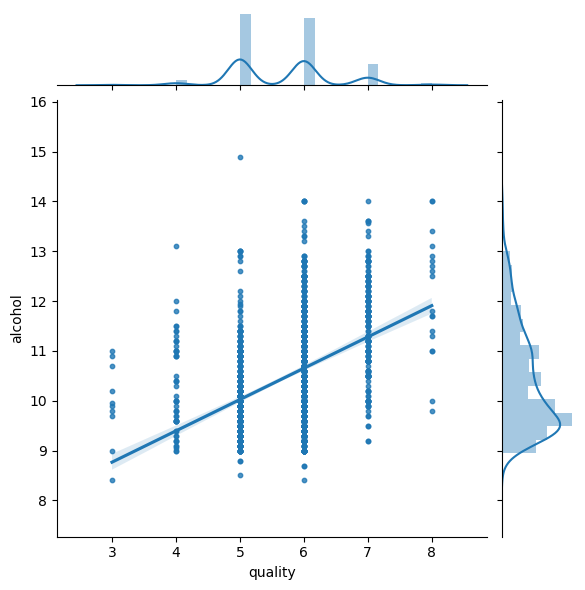

In [49]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
quality_alcohol = df[['alcohol', 'quality']]

g = sns.JointGrid(x="quality", y="alcohol", data=quality_alcohol, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

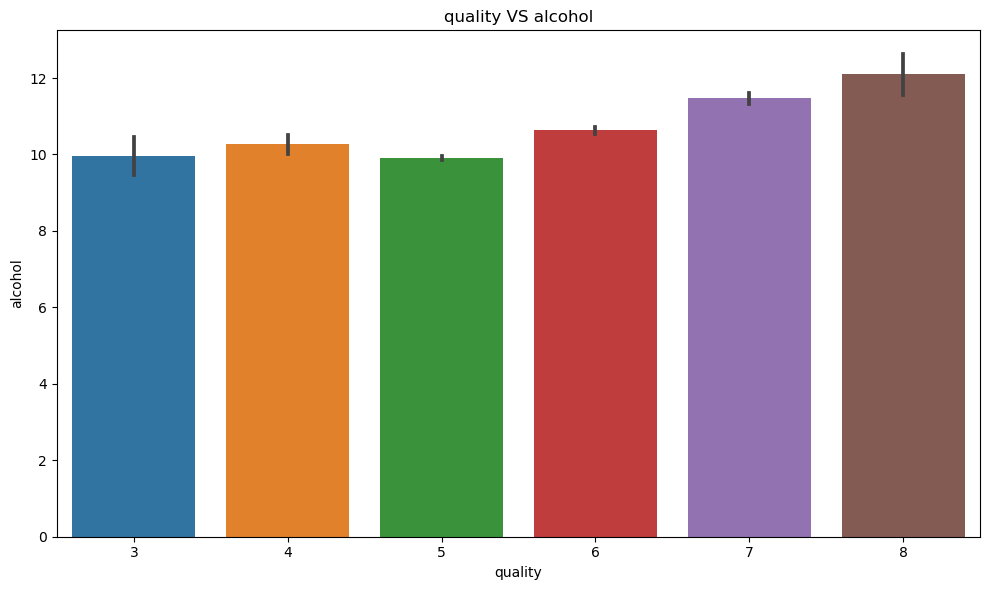

<Figure size 640x480 with 0 Axes>

In [50]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

Above plots display how the increase in alcohol increases the quality of wine.

# Multvariant Analysis

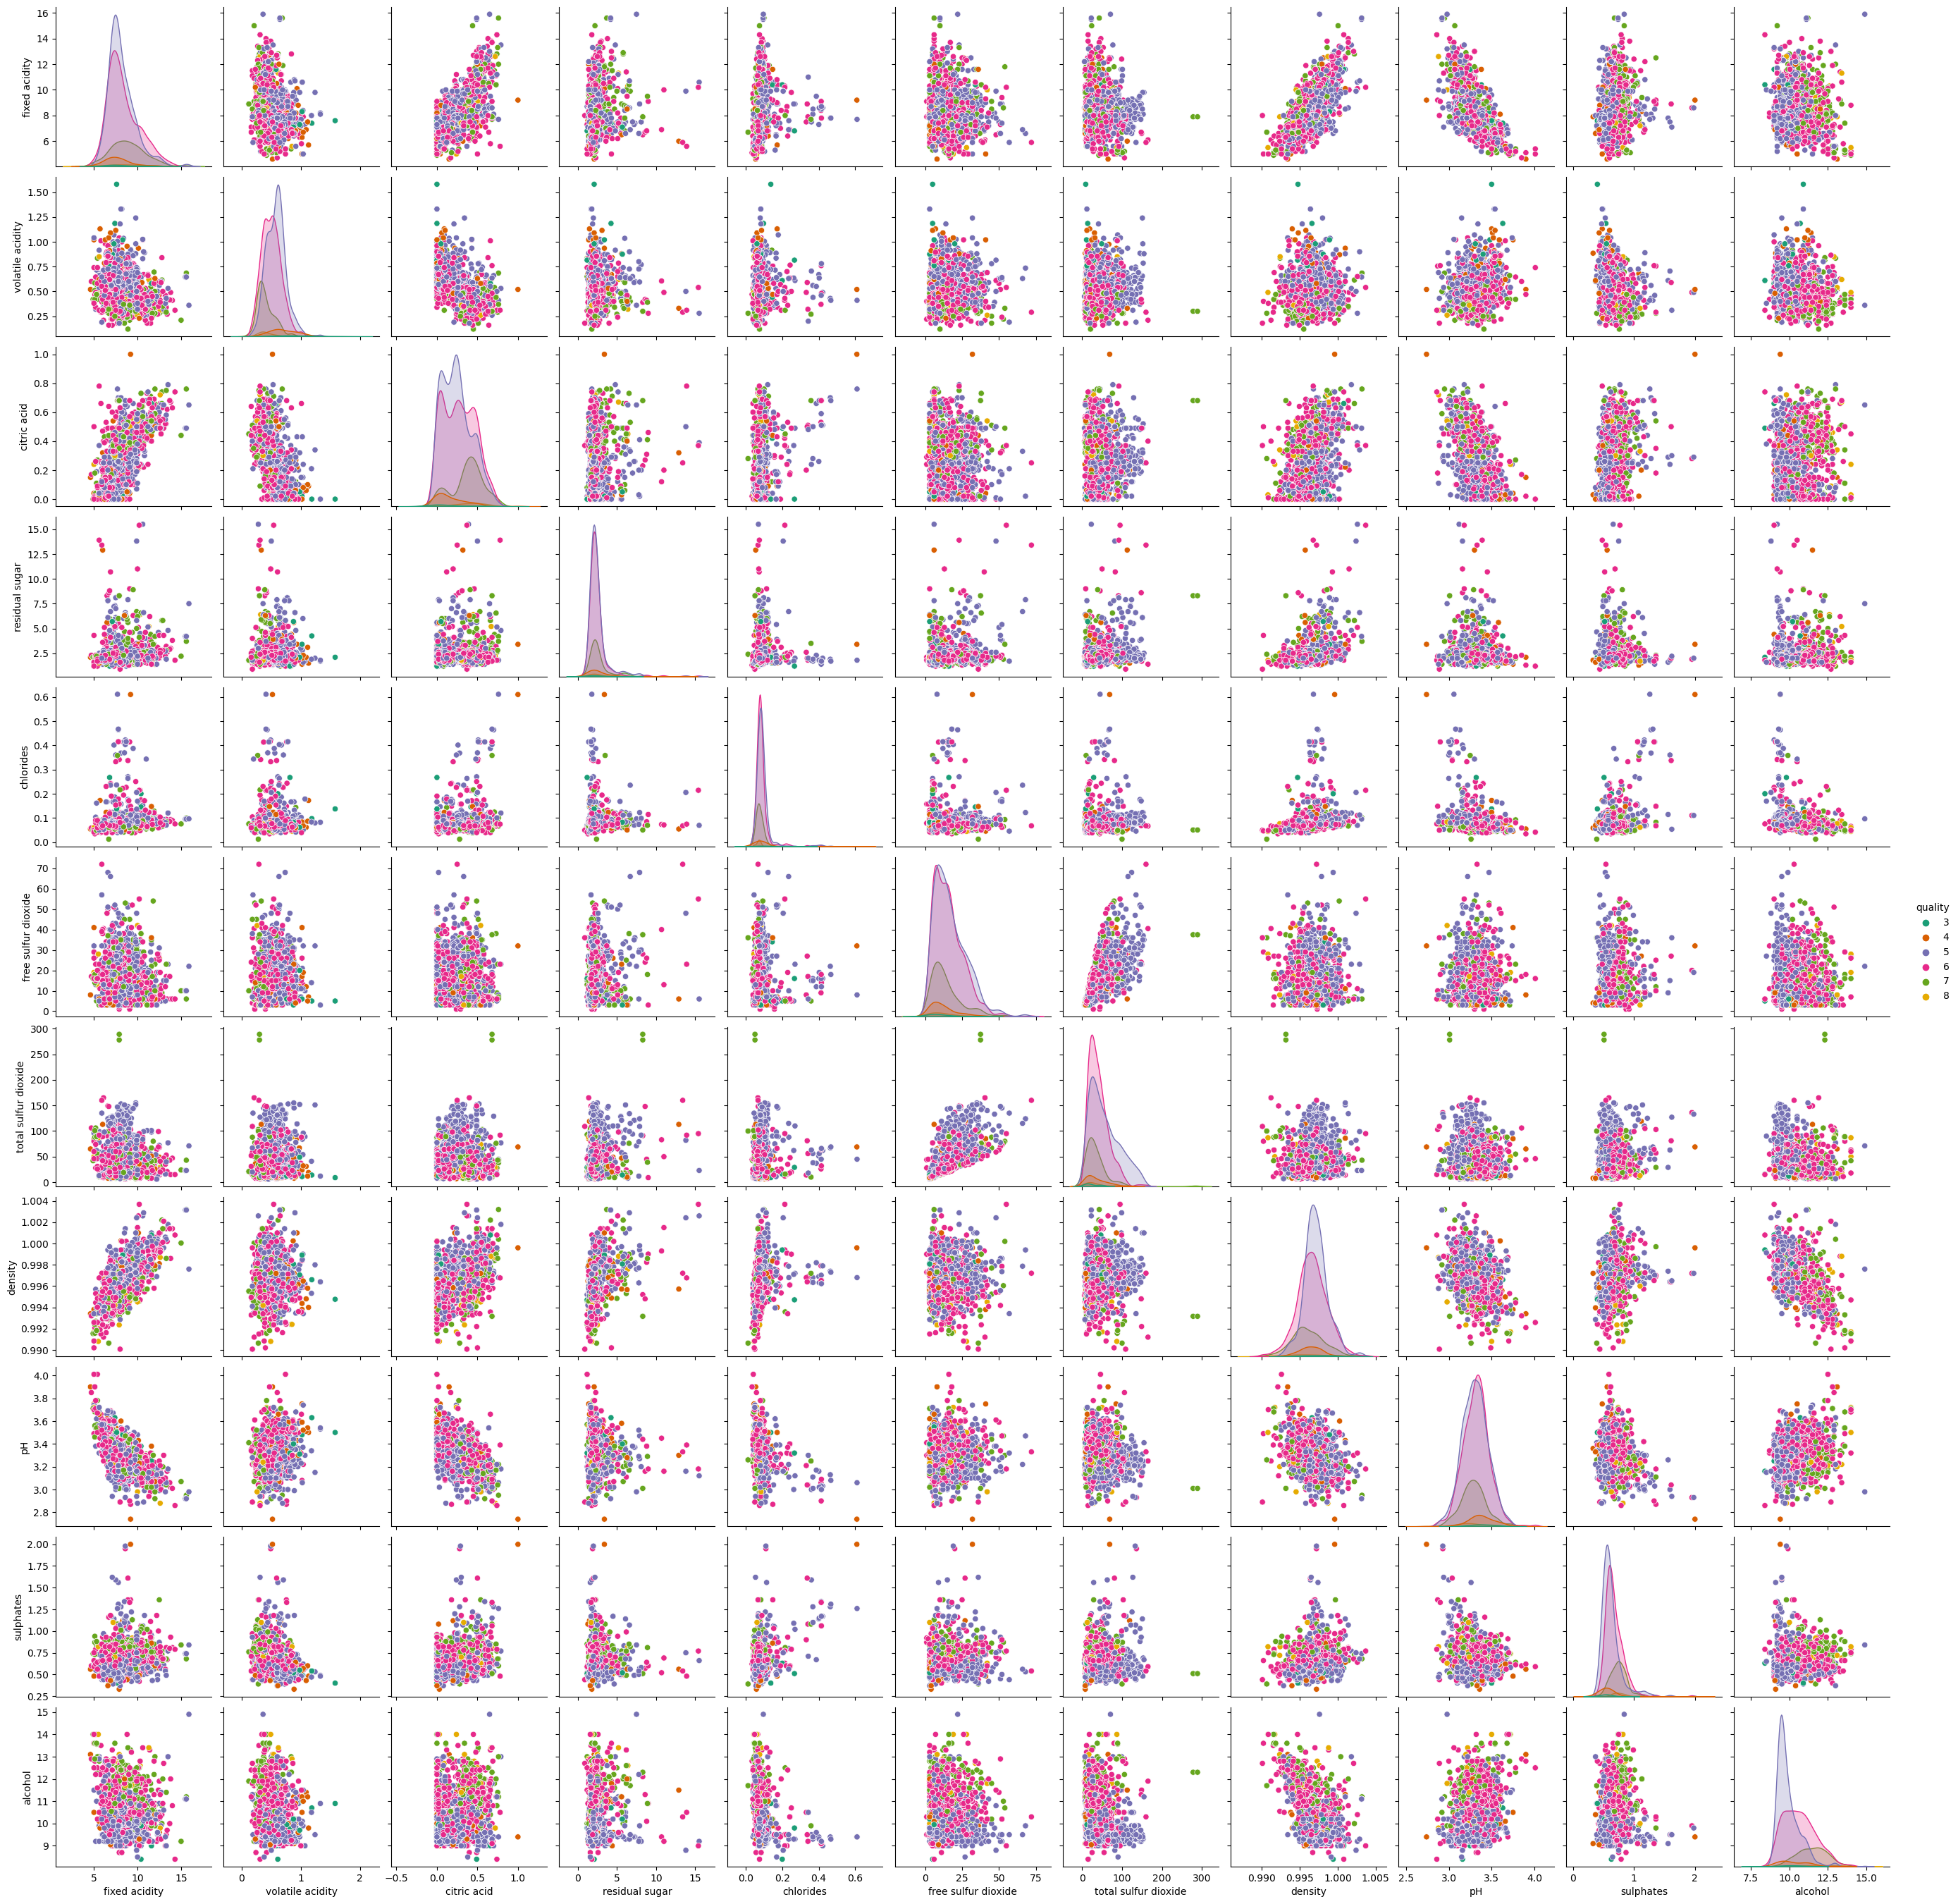

In [53]:
sns.pairplot(df, hue="quality", palette = "Dark2")
plt.show()

# Checking for outliers

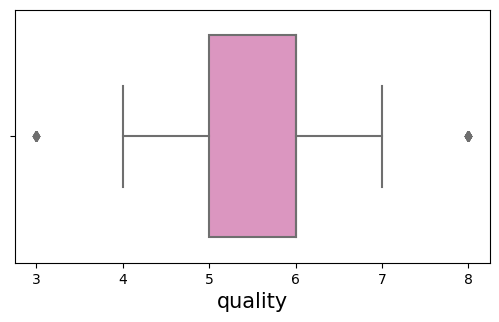

In [52]:
#lets check the outliers by plotting boxplot.

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()
    


In [54]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness of quality column is 0.2 so the weight in the left tail of the distribution.

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point.
Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.
Distribution on the basis of skewness value:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [57]:
#Removing skewness using cuberoot method

df['fixed acidity']=np.cbrt(df['fixed acidity'])


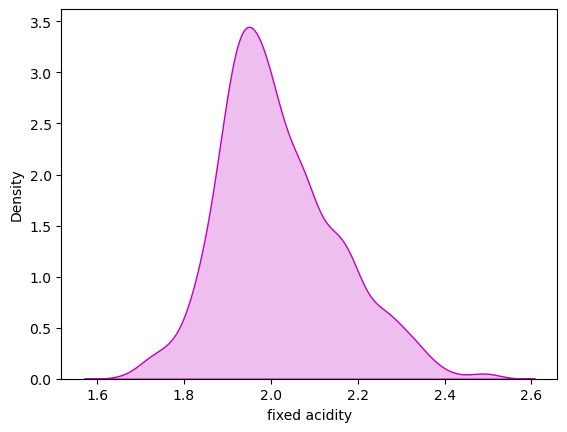

In [58]:
#Let visualize how the data distributed in alcohol after removing skewness

sns.distplot(df['fixed acidity'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [60]:
#Removing skewness using cuberoot method

df['alcohol']=np.cbrt(df['alcohol'])


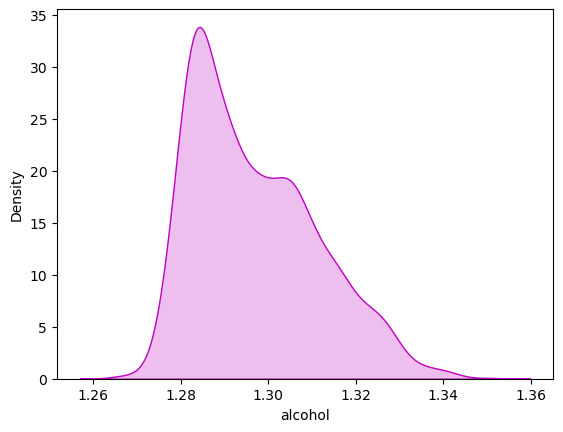

In [61]:
#Let visualize how the data distributed in alcohol after removing skewness

sns.distplot(df['alcohol'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

# Encoding categorical columns

In [62]:
#Encoding categorical columns using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df    

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          1.948695             0.700         0.00             1.9      0.076   
1          1.983192             0.880         0.00             2.6      0.098   
2          1.983192             0.760         0.04             2.3      0.092   
3          2.237378             0.280         0.56             1.9      0.075   
4          1.948695             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594       1.837091             0.600         0.08             2.0      0.090   
1595       1.806969             0.550         0.10             2.2      0.062   
1596       1.846915             0.510         0.13             2.3      0.076   
1597       1.806969             0.645         0.12             2.0      0.075   
1598       1.817121             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

       alcohol  quality  
0     1.282701        5  
1     1.288654        5  
2     1.288654        5  
3     1.288654        6  
4     1.282701        5  
...        ...      ...  
1594  1.298570        5  
1595  1.307916        6  
1596  1.305300        6  
1597  1.294395        5  
1598  1.305300        6  

[1599 rows x 12 columns]

In [63]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        2.017049          0.527821     0.270976        2.538806   
std         0.135981          0.179060     0.194801        1.409928   
min         1.663103          0.120000     0.000000        0.900000   
25%         1.921997          0.390000     0.090000        1.900000   
50%         1.991632          0.520000     0.260000        2.200000   
75%         2.095379          0.640000     0.420000        2.600000   
max         2.514581          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149     1.296867     5.636023  
std       0.154386     0.169507     0.014303     0.807569  
min       2.740000     0.330000     1.266770     3.000000  
25%       3.210000     0.550000     1.284210     5.000000  
50%       3.310000     0.620000     1.294395     6.000000  
75%       3.400000     0.730000     1.306613     6.000000  
max       4.010000     2.000000     1.350063     8.000000

# Correlation between target variable and independent variables

In [64]:
#checking the correlation between features and the target.

cor = df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.254872     0.670553   
volatile acidity          -0.254872          1.000000    -0.552496   
citric acid                0.670553         -0.552496     1.000000   
residual sugar             0.111275          0.001918     0.143577   
chlorides                  0.105380          0.061298     0.203823   
free sulfur dioxide       -0.152249         -0.010504    -0.060978   
total sulfur dioxide      -0.107633          0.076470     0.035533   
density                    0.673615          0.022026     0.364947   
pH                        -0.699735          0.234937    -0.541904   
sulphates                  0.181550         -0.260987     0.312770   
alcohol                   -0.081907         -0.201583     0.109116   
quality                    0.118123         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111275   0.105380            -0.152249   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.039387  -0.225301            -0.070561   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.107633  0.673615 -0.699735   0.181550   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.212780 -0.491596  0.206160   0.093675   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.081907  0.118123  
volatile acidity     -0.201583 -0.390558  
citric acid           0.109116  0.226373  
residual sugar        0.039387  0.013732  
chlorides            -0.225301 -0.128907  
free sulfur dioxide  -0.070561 -0.050656  
total sulfur dioxide -0.212780 -0.185100  
density              -0.491596 -0.174919  
pH                    0.206160 -0.057731  
sulphates             0.093675  0.251397  
alcohol               1.000000  0.476987  
quality               0.476987  1.000000

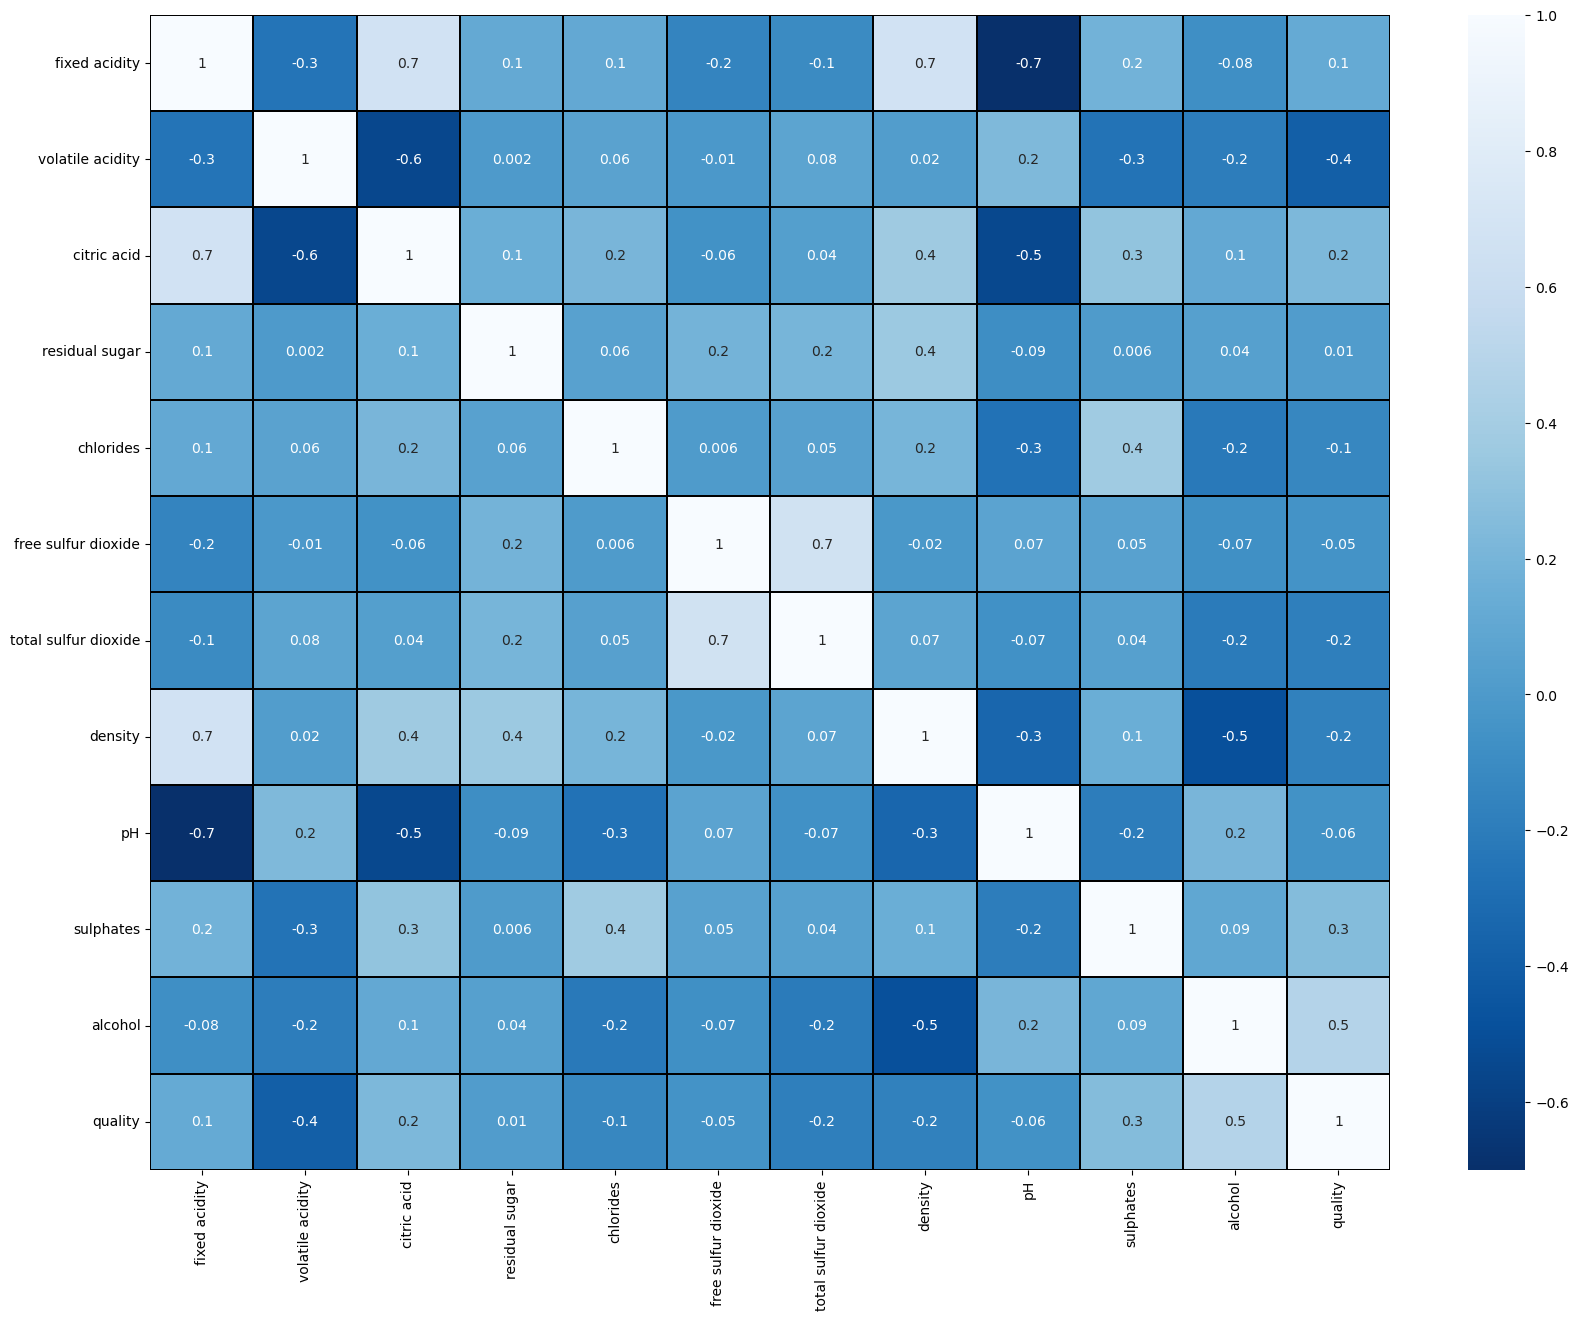

In [65]:
#visualizing the correlation matrix by plotting heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),linewidths = 0.1,fmt = ".1g",linecolor = "black",annot = True, cmap="Blues_r")
plt.yticks(rotation = 0);
plt.show()


In [ ]:
#less correlation -0.3 to +0.3, greater than -0.5 moderate correlation, greater than -0.7 or greater 0.7 is higher correlation

In [66]:
cor['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476987
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.118123
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# Visualizing the correlation between label and features using bar plot

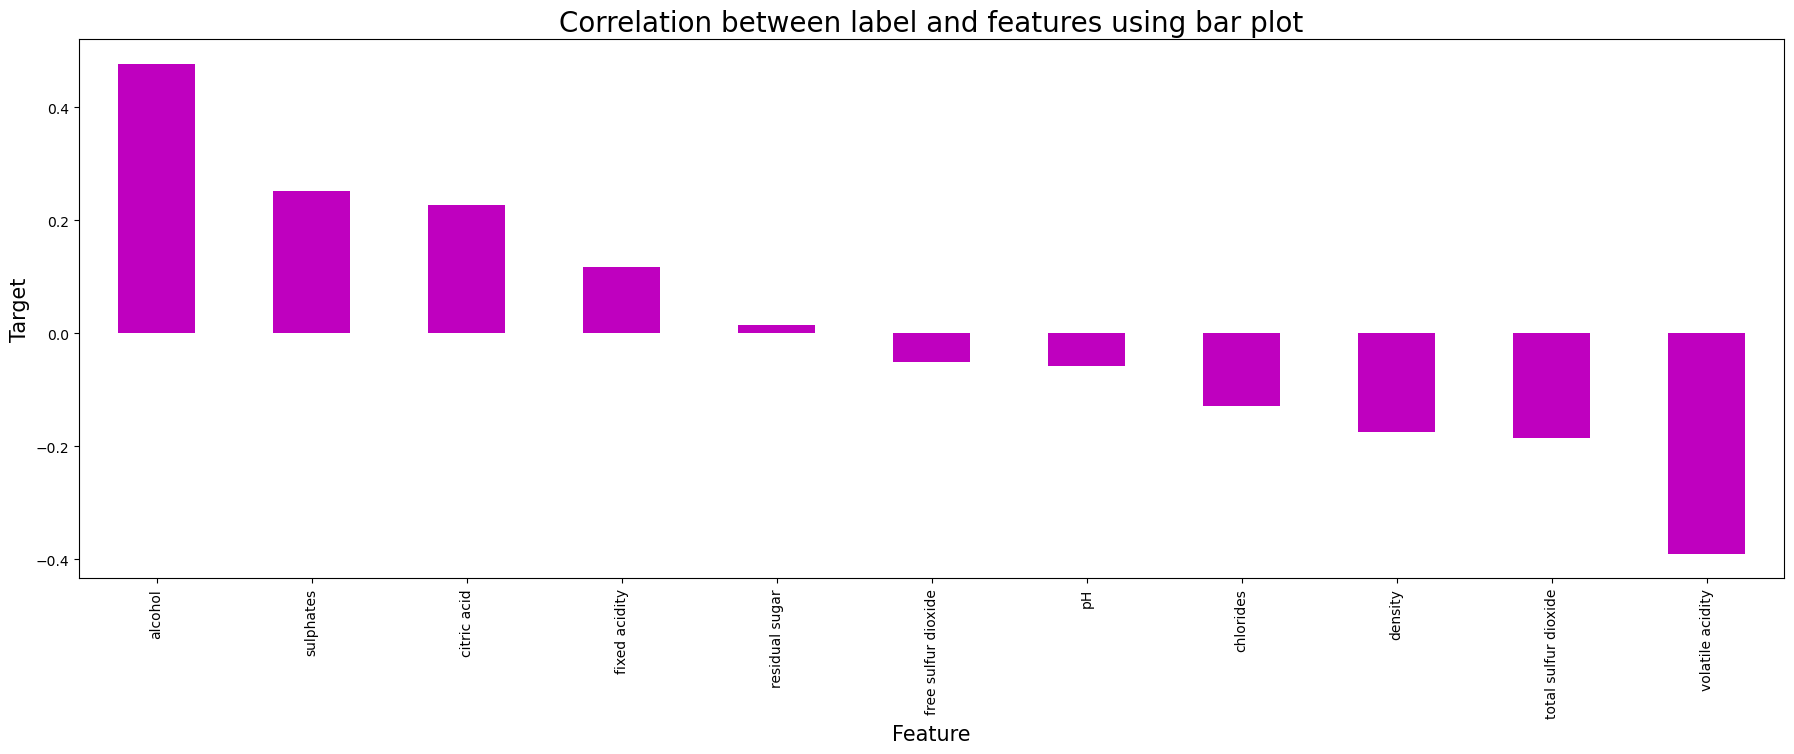

In [67]:

plt.figure(figsize = (22,7))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()


# Separating features and label

In [68]:
x = df.drop("quality",axis = 1)
y = df["quality"]

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.502833          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.249061          1.967442    -1.391472        0.043416   0.223875   
2         -0.249061          1.297065    -1.186070       -0.169427   0.096353   
3          1.620799         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.502833          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.323829          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.545413          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.251559         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.545413          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.470734         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  
0     -0.579207 -0.990783  
1      0.128950 -0.574443  
2     -0.048089 -0.574443  
3     -0.461180 -0.574443  
4     -0.579207 -0.990783  
...         ...       ...  
1594  -0.461180  0.119099  
1595   0.601055  0.772694  
1596   0.542042  0.589745  
1597   0.305990 -0.172942  
1598   0.010924  0.589745  

[1599 rows x 11 columns]

### Checking Variance inflation Factor(VIF)

In [70]:
#Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2)).
#A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
#In statistical terms, a multiple regression model where there is high multicollinearity will make it more difficult to estimate 
#the relationship between each of the independent variables and the dependent variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values              Features
0     8.106944         fixed acidity
1     1.788894      volatile acidity
2     3.121970           citric acid
3     1.702269        residual sugar
4     1.478112             chlorides
5     1.963468   free sulfur dioxide
6     2.197494  total sulfur dioxide
7     6.313926               density
8     3.528658                    pH
9     1.434540             sulphates
10    2.916181               alcohol

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling methods.

In [71]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Oversampling

In [72]:
#oversampling the data

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)


In [73]:
y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

# Train/ Test Modeling

Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data. 



In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu =0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc >maxAccu:
        maxAcc = acc
        maxRS = i
print("Best accuracy is ",maxAccu, "at random_state",maxRS)


Best accuracy is  0 at random_state 199


## Creating train test split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = maxRS)


## Classification Algorithms

In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


### RandomForest Classifier

In [77]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8580750407830342
[[214   0   1   0   0   0]
 [  0 166   5   1   0   0]
 [  2  18 153  29   6   0]
 [  0  12  47 119  28   9]
 [  0   2   1   7 192   6]
 [  0   0   0   0   0 208]]
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       215
           4       0.84      0.97      0.90       172
           5       0.74      0.74      0.74       208
           6       0.76      0.55      0.64       215
           7       0.85      0.92      0.88       208
           8       0.93      1.00      0.97       208

    accuracy                           0.86      1226
   macro avg       0.85      0.86      0.85      1226
weighted avg       0.85      0.86      0.85      1226



## Logistic Regression

In [78]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5929853181076672
[[187  25   0   3   0   0]
 [ 29  87  33  21   2   0]
 [ 17  35 118  31   4   3]
 [  6  26  53  73  39  18]
 [  0  11   6  35 112  44]
 [  0   0   0   0  58 150]]
              precision    recall  f1-score   support

           3       0.78      0.87      0.82       215
           4       0.47      0.51      0.49       172
           5       0.56      0.57      0.56       208
           6       0.45      0.34      0.39       215
           7       0.52      0.54      0.53       208
           8       0.70      0.72      0.71       208

    accuracy                           0.59      1226
   macro avg       0.58      0.59      0.58      1226
weighted avg       0.58      0.59      0.59      1226



## Support Vector Machine Classifier

In [79]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.7626427406199021
[[214   0   1   0   0   0]
 [  6 153  10   1   2   0]
 [ 11  24 126  45   2   0]
 [  3  19  49  95  37  12]
 [  0   5   8  28 139  28]
 [  0   0   0   0   0 208]]
              precision    recall  f1-score   support

           3       0.91      1.00      0.95       215
           4       0.76      0.89      0.82       172
           5       0.65      0.61      0.63       208
           6       0.56      0.44      0.49       215
           7       0.77      0.67      0.72       208
           8       0.84      1.00      0.91       208

    accuracy                           0.76      1226
   macro avg       0.75      0.77      0.75      1226
weighted avg       0.75      0.76      0.75      1226



##  AdaBoost Classifier

In [80]:
#checking accuracy for Adaboost classifier

ABC =AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))


0.36867862969004894
[[ 55 110  50   0   0   0]
 [ 13  96  38  18   5   2]
 [ 17  76  74  26   9   6]
 [  7  32  45  60  36  35]
 [  1   7   7  20  61 112]
 [  0   0   0   2 100 106]]
              precision    recall  f1-score   support

           3       0.59      0.26      0.36       215
           4       0.30      0.56      0.39       172
           5       0.35      0.36      0.35       208
           6       0.48      0.28      0.35       215
           7       0.29      0.29      0.29       208
           8       0.41      0.51      0.45       208

    accuracy                           0.37      1226
   macro avg       0.40      0.38      0.37      1226
weighted avg       0.41      0.37      0.36      1226



# Bagging Classifier

In [81]:
#checking accuracy for Bagging classifier

BC =BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))


0.831973898858075
[[214   0   1   0   0   0]
 [  2 164   4   2   0   0]
 [  4  22 153  23   6   0]
 [  3  16  45 108  36   7]
 [  0   2   3  17 181   5]
 [  0   0   0   0   8 200]]
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       215
           4       0.80      0.95      0.87       172
           5       0.74      0.74      0.74       208
           6       0.72      0.50      0.59       215
           7       0.78      0.87      0.82       208
           8       0.94      0.96      0.95       208

    accuracy                           0.83      1226
   macro avg       0.83      0.84      0.83      1226
weighted avg       0.83      0.83      0.82      1226



# ExtraTreesClassifier

In [88]:
#Checking accuracy for ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.8760195758564437
[[215   0   0   0   0   0]
 [  1 167   2   2   0   0]
 [  6  13 154  32   3   0]
 [  1  10  46 130  23   5]
 [  0   0   1   5 200   2]
 [  0   0   0   0   0 208]]
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       215
           4       0.88      0.97      0.92       172
           5       0.76      0.74      0.75       208
           6       0.77      0.60      0.68       215
           7       0.88      0.96      0.92       208
           8       0.97      1.00      0.98       208

    accuracy                           0.88      1226
   macro avg       0.87      0.88      0.87      1226
weighted avg       0.87      0.88      0.87      1226



### Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [82]:
from sklearn.model_selection import cross_val_score


cv=5--- it's a fold value  1, 2, 3, 4, 5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafulat scoring parameter is - r2 score


In [83]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())


[0.83740831 0.80416157 0.81028152 0.83476132 0.83476132]
0.8242748082465219
Difference between Accuracy score and cross validation score is - 0.03380023253651232


In [84]:
#Checking cv score for Logistic Regression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())


[0.60391198 0.54589963 0.57405141 0.56548348 0.5875153 ]
0.5753723593683133
Difference between Accuracy score and cross validation score is - 0.017612958739353868


In [85]:
#Checking cv score for Support Vector Machine Classifier

score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predsvc)-score.mean())


[0.76405868 0.73194614 0.71358629 0.75152999 0.76866585]
0.7459573907760816
Difference between Accuracy score and cross validation score is - 0.01668534984382053


In [86]:
#Checking cv score for Bagging Classifier
BC = BaggingClassifier()
#predBC = BC.predict(x_test)

score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predBC)-score.mean())


[0.77017115 0.76499388 0.77600979 0.8127295  0.80416157]
0.785613177197272
Difference between Accuracy score and cross validation score is - 0.04636072166080307


In [89]:
#Checking cv score for Extra Trees Classifier

ET = ExtraTreesClassifier()

score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predET)-score.mean())


[0.84596577 0.81395349 0.83108935 0.85312118 0.84822521]
0.8384709998114637
Difference between Accuracy score and cross validation score is - 0.037548576044980075


Observing the classifiers in our model, Support Vector Machine Classifier is our best model as the difference between accuracy score and cross validation is least. 

### Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or
Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
GVC = GridSearchCV(svc, parameters, cv=5)
GVC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {'n_neighbors': [3,5,7,9,11,13],'weights': ['uniform', 'distance'],'p': [1,2]}

GVC = GridSearchCV(estimator=knn,param_grid=params,cv=5,n_jobs=5,verbose=1)

In [118]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

In [119]:
# Fitting our GridSearchCV Object
GVC.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [122]:
GVC.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [ ]:
Final_model = SVC(parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]})

Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

I am not able to get the right parameter of SVC passed down to get the final model( still pending)

# ROC/AUC Method

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve


#ROC reciever operator curve
#AUC Area under the curve
#binary classifier

In [ ]:
y_pred_prob = Final_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='SVC(are=%0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc Score:','\n',auc_score)

# saving the model

In [ ]:
import joblib
joblib.dump(Final_model,"Wine_project.pkl")

## Predicting the saved model

In [ ]:
#Lets load the saved model and get the prediction

model = joblib.load("Wine_project.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


In [ ]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

Final Conclusion: SVC model give us the best classification model based on our data of wine quality